# Coronavirus Brasil - Gráficos estáticos
> Gráficos e análises dos estados brasileiros

- toc: false
- branch: master
- badges: false
- comments: false
- author: Vinicius Bastos Gomes & Fernando Wittmann
- categories: [coronavirus]



Fonte atual: 'https://data.brasil.io/dataset/covid19/caso.csv.gz'

In [0]:
#hide
# Imports
import warnings
warnings.filterwarnings('ignore')
import gzip
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('dark')

In [2]:
#hide
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#hide
# Abrir pasta com os arquivos
%cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [0]:
#hide
!rm '/content/drive/My Drive/CoronaVirus Brasil/caso.csv.gz'

In [0]:
#hide
# Parameters
BOLETIM = 'https://data.brasil.io/dataset/covid19/boletim.csv.gz'
CASOS = 'https://data.brasil.io/dataset/covid19/caso.csv.gz'

In [0]:
#hide
# Functions
def sigla_nome(x):
    return dic[x]

def populacao(x):
    return popu[x]

In [7]:
#hide
# Execution
!wget {CASOS}

--2020-04-05 13:29:49--  https://data.brasil.io/dataset/covid19/caso.csv.gz
Resolving data.brasil.io (data.brasil.io)... 192.99.5.40
Connecting to data.brasil.io (data.brasil.io)|192.99.5.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56298 (55K) [application/gzip]
Saving to: ‘caso.csv.gz’

caso.csv.gz         100%[===================>]  54.98K  --.-KB/s    in 0.04s   

2020-04-05 13:29:49 (1.49 MB/s) - ‘caso.csv.gz’ saved [56298/56298]



In [8]:
#hide
#manipulating datetime
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

'2020-04-04'

In [0]:

#hide
with gzip.open('caso.csv.gz', 'rb') as f_in:
    with open('caso.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [10]:
#hide
ls

2020-04-04-corona-brasil-estatico.ipynb    brasil-cidades.ipynb  dados.csv
2020-04-04-corona-brasil-interativo.ipynb  Brasil.ipynb          graficovid/
2020-04-04-corona-mundo-estatico.ipynb     caso.csv              plots/
2020-04-04-corona-mundo-interativo.ipynb   caso.csv.gz
ANO_MES_DIA_projecao_brasil.ipynb          caso.csv.gz.1


In [0]:
#hide
#dictionaries
casos = pd.read_csv('caso.csv')
dic = {'AC': "Acre",  'AL': "Alagoas",  'AM': "Amapá", 'AP': "Amazonas", 'BA': "Bahia", 'CE': "Ceará", 'DF': "Distrito Federal",'ES': "Espírito Santo",'GO': "Goiás",'MA': "Maranhão",'MG': "Minas Gerais",'MS': "Mato Grosso do Sul",'MT': "Mato Grosso",'PA': "Pará",'PB': "Paraíba",'PE': "Pernambuco",'PI': "Piauí",'PR': "Paraná",'RJ': "Rio de Janeiro",'RN': "Rio Grande do Norte",'RO': "Rondônia",'RR': "Roraima",'RS': "Rio Grande do Sul",'SC': "Santa Catarina",'SE': "Sergipe",'SP': "São Paulo",'TO': "Tocantins"} 
popu ={'AC': 881935,'AL': 3337357,'AM': 4144597,'AP': 845731,'BA': 14873064,'CE': 9132078,'DF': 3015268,'ES': 4018650,'GO': 7018354,'MA': 7075181,'MG': 21168791,'MS': 2778986,'MT': 3484466,'PA': 8602865,'PB': 4018127,'PE': 9557071,'PI': 3273227,'PR': 11433957,'RJ': 17264943,'RN': 3506853,'RO': 1777225,'RR': 605761,'RS': 11377239,'SC': 7164788,'SE': 2298696,'SP': 45919049,'TO': 1572866}

In [0]:
#hide
#casos.set_index('date',inplace=True)


In [12]:
#hide
casos

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-04,AC,NaN,state,46,0.0,19,True,881935.0,12.0,5.21580,NaN
1,2020-04-03,AC,NaN,state,46,0.0,18,False,881935.0,12.0,5.21580,NaN
2,2020-04-02,AC,NaN,state,45,0.0,17,False,881935.0,12.0,5.10242,NaN
3,2020-04-01,AC,NaN,state,43,0.0,16,False,881935.0,12.0,4.87564,NaN
4,2020-03-31,AC,NaN,state,42,0.0,15,False,881935.0,12.0,4.76226,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5606,2020-03-29,AL,Porto Real do Colégio,city,1,0.0,5,False,20066.0,2707503.0,4.98355,NaN
5607,2020-03-28,AL,Porto Real do Colégio,city,1,0.0,4,False,20066.0,2707503.0,4.98355,NaN
5608,2020-03-27,AL,Porto Real do Colégio,city,1,0.0,3,False,20066.0,2707503.0,4.98355,NaN
5609,2020-03-26,AL,Porto Real do Colégio,city,1,0.0,2,False,20066.0,2707503.0,4.98355,NaN


In [13]:
#hide
sp = casos[casos['state']=='SP']
x = sp[sp.duplicated('date')]
x

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
940,2020-04-04,SP,Adamantina,city,1,0.0,2,True,35068.0,3500105.0,2.85160,NaN
941,2020-04-03,SP,Adamantina,city,1,0.0,1,False,35068.0,3500105.0,2.85160,NaN
942,2020-04-04,SP,Agudos,city,1,0.0,3,True,37214.0,3500709.0,2.68716,NaN
943,2020-04-03,SP,Agudos,city,1,0.0,2,False,37214.0,3500709.0,2.68716,NaN
944,2020-04-02,SP,Agudos,city,1,0.0,1,False,37214.0,3500709.0,2.68716,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2020-04-01,SP,Votuporanga,city,1,0.0,2,False,94547.0,3557105.0,1.05768,NaN
1599,2020-03-31,SP,Votuporanga,city,1,0.0,1,False,94547.0,3557105.0,1.05768,NaN
1600,2020-04-04,SP,Águas de Lindóia,city,1,0.0,3,True,18705.0,3500501.0,5.34616,NaN
1601,2020-04-03,SP,Águas de Lindóia,city,1,0.0,2,False,18705.0,3500501.0,5.34616,NaN


In [14]:
#hide
y = casos[casos.duplicated(subset=['date','city'])]
y

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
52,2020-04-04,TO,NaN,state,16,0.0,16,True,1572866.0,17.0,1.01725,NaN
53,2020-04-03,TO,NaN,state,13,0.0,15,False,1572866.0,17.0,0.82652,NaN
54,2020-04-02,TO,NaN,state,12,0.0,14,False,1572866.0,17.0,0.76294,NaN
55,2020-04-01,TO,NaN,state,12,0.0,13,False,1572866.0,17.0,0.76294,NaN
56,2020-03-31,TO,NaN,state,12,0.0,12,False,1572866.0,17.0,0.76294,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5568,2020-04-02,AL,Importados/Indefinidos,city,4,0.0,5,False,NaN,NaN,NaN,NaN
5569,2020-04-01,AL,Importados/Indefinidos,city,4,0.0,4,False,NaN,NaN,NaN,NaN
5570,2020-03-31,AL,Importados/Indefinidos,city,4,0.0,3,False,NaN,NaN,NaN,NaN
5571,2020-03-30,AL,Importados/Indefinidos,city,4,0.0,2,False,NaN,NaN,NaN,NaN


In [0]:
#hide
casos = casos.drop_duplicates(['date','city'],keep='first')

In [16]:
#hide
casos_por_estado = casos.groupby(['state','date']).sum()[['confirmed', 'deaths']]
casos_por_estado

confirmed  deaths
state date                         
AC    2020-03-17          6     0.0
      2020-03-18          6     0.0
      2020-03-19          8     0.0
      2020-03-20         14     0.0
      2020-03-21         22     0.0
...                     ...     ...
TO    2020-03-31         12     0.0
      2020-04-01         12     0.0
      2020-04-02         12     0.0
      2020-04-03         13     0.0
      2020-04-04         16     0.0

[538 rows x 2 columns]

In [0]:
#hide
casos_por_estado = casos_por_estado.reset_index(level=[0,1])



In [18]:
#hide

casos_por_estado['date'] = pd.to_datetime(casos_por_estado['date'],infer_datetime_format=True)
casos_por_estado[casos_por_estado['state']=='São Paulo']

,state,date,confirmed,deaths


In [19]:
#hide
x = casos_por_estado[casos_por_estado.duplicated(subset=['state','date'])]
x

,state,date,confirmed,deaths


In [20]:
#hide
#casos_por_estado.set_index('date',inplace=True)
casos_por_estado.tail(5)

,state,date,confirmed,deaths
533,TO,2020-03-31,12,0.0
534,TO,2020-04-01,12,0.0
535,TO,2020-04-02,12,0.0
536,TO,2020-04-03,13,0.0
537,TO,2020-04-04,16,0.0


In [21]:
#hide
# adding a relative approach column
casos_por_estado['população']=casos_por_estado['state']
casos_por_estado['população'] = casos_por_estado['população'].apply(populacao)
casos_por_estado['Relativa'] = 10000*(casos_por_estado['confirmed']/casos_por_estado['população']) #a cada 10 mil
casos_por_estado.tail(5)

,state,date,confirmed,deaths,população,Relativa
533,TO,2020-03-31,12,0.0,1572866,0.076294
534,TO,2020-04-01,12,0.0,1572866,0.076294
535,TO,2020-04-02,12,0.0,1572866,0.076294
536,TO,2020-04-03,13,0.0,1572866,0.082652
537,TO,2020-04-04,16,0.0,1572866,0.101725


In [22]:
#hide
casos_por_estado[casos_por_estado['state']=='SP'].tail(5)

,state,date,confirmed,deaths,população,Relativa
516,SP,2020-03-31,2286,135.0,45919049,0.497833
517,SP,2020-04-01,2922,164.0,45919049,0.636337
518,SP,2020-04-02,3431,188.0,45919049,0.747184
519,SP,2020-04-03,3979,219.0,45919049,0.866525
520,SP,2020-04-04,3979,219.0,45919049,0.866525


In [0]:
#hide

# Generalizando para um loop
#plt.figure(figsize=(16, 8))
#lista_estados = casos_por_estado['state'].unique()
#
#for estado in lista_estados:
#    confirmed = casos_por_estado[casos_por_estado['state']==estado][['date', 'confirmed']]
#    confirmed['date'] = pd.to_datetime(confirmed['date'])
#    plt.plot(confirmed['date'], confirmed['confirmed'], label=estado)
#
#plt.legend()


In [23]:
#hide
# Change states` names
casos_por_estado['state'] = casos_por_estado['state'].apply(sigla_nome)
casos_por_estado.tail()

,state,date,confirmed,deaths,população,Relativa
533,Tocantins,2020-03-31,12,0.0,1572866,0.076294
534,Tocantins,2020-04-01,12,0.0,1572866,0.076294
535,Tocantins,2020-04-02,12,0.0,1572866,0.076294
536,Tocantins,2020-04-03,13,0.0,1572866,0.082652
537,Tocantins,2020-04-04,16,0.0,1572866,0.101725


In [24]:
#hide
#beggining on march 5
casos_por_estado['date'] = pd.to_datetime(casos_por_estado['date']) 
casos_mar5 = casos_por_estado[casos_por_estado['date']>='2020-03-15']
casos_mar5.head()


,state,date,confirmed,deaths,população,Relativa
0,Acre,2020-03-17,6,0.0,881935,0.068032
1,Acre,2020-03-18,6,0.0,881935,0.068032
2,Acre,2020-03-19,8,0.0,881935,0.090710
3,Acre,2020-03-20,14,0.0,881935,0.158742
4,Acre,2020-03-21,22,0.0,881935,0.249451


<center> <h2> Gráficos de contaminação </h2> </center>


In [0]:
#hide
casos_mar5.sort_values('confirmed',ascending=False,inplace=True)
hue1 = casos_mar5['state'].unique()

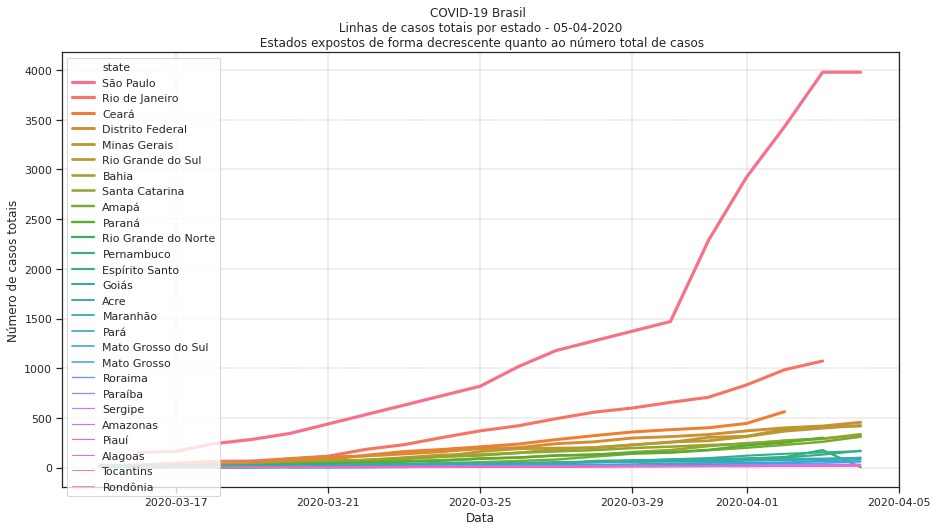

In [26]:
#hide_input

#absolute approach line plot
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='confirmed',data=casos_mar5,hue='state',size="state",hue_order=hue1)
plt.title('COVID-19 Brasil \n Linhas de casos totais por estado - {} \n Estados expostos de forma decrescente quanto ao número total de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Número de casos totais')
plt.savefig("plots/15_curvas_brasileiras.png")


In [0]:
#hide
casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
hue = casos_mar5['state'].unique()

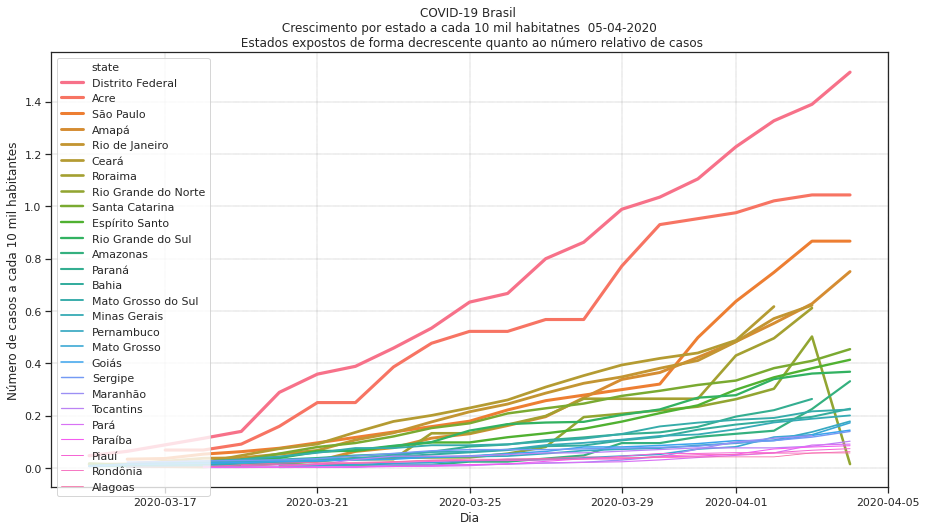

In [28]:
#hide_input

#Relativa approach line plot
casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='Relativa',data=casos_mar5,hue='state',size="state",hue_order=hue)
plt.title('COVID-19 Brasil \n Crescimento por estado a cada 10 mil habitatnes  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dia')
plt.ylabel('Número de casos a cada 10 mil habitantes')
plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')

In [0]:
#hide
casos_mar5 =casos_mar5.sort_values(['state','date'])

In [30]:
#hide
df_last = casos_mar5.groupby('state').max()[['date','confirmed','deaths','Relativa']]
df_last = df_last.reset_index()
df_last.tail(3)

,state,date,confirmed,deaths,Relativa
24,Sergipe,2020-04-04,32,3.0,0.139209
25,São Paulo,2020-04-04,3979,219.0,0.866525
26,Tocantins,2020-04-04,16,0.0,0.101725


In [0]:
#hide
#dropping DF
df_last_semdf = df_last[df_last['state']!='Distrito Federal']

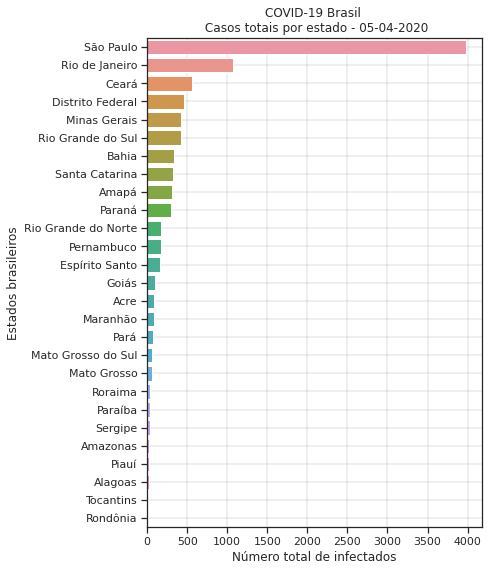

In [32]:
#hide_input
# absolute approach bar plot
df_last.sort_values('confirmed',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
sns.barplot(df_last['confirmed'],df_last['state'],orient="h",)
plt.ylabel('Estados brasileiros')
plt.xlabel('Número total de infectados')
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))


plt.savefig('plots/12_brasil',bbox_inches = 'tight')

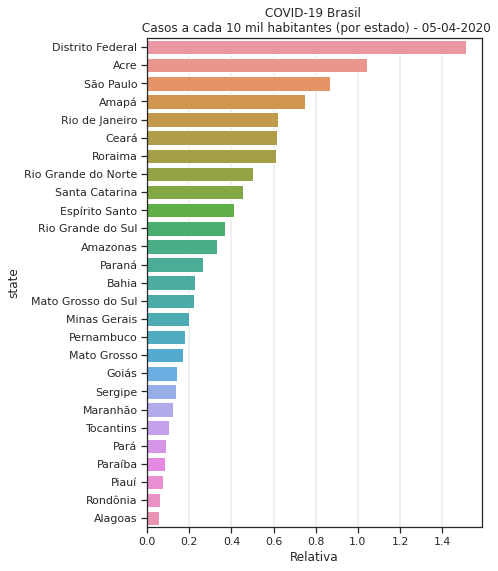

In [33]:
#hide_input

# relative approach bar plot

df_last.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado) - {}'.format(today))
plt.ylabel('Estados brasileiros')
plt.xlabel('Infectados a cada 10 mil habitantes')
sns.barplot(df_last['Relativa'],df_last['state'],orient="h")

plt.savefig('plots/13_brasil_relativo',bbox_inches = 'tight')

In [0]:
#hide
df_last_semdf.sort_values('Relativa',ascending=False,inplace=True)


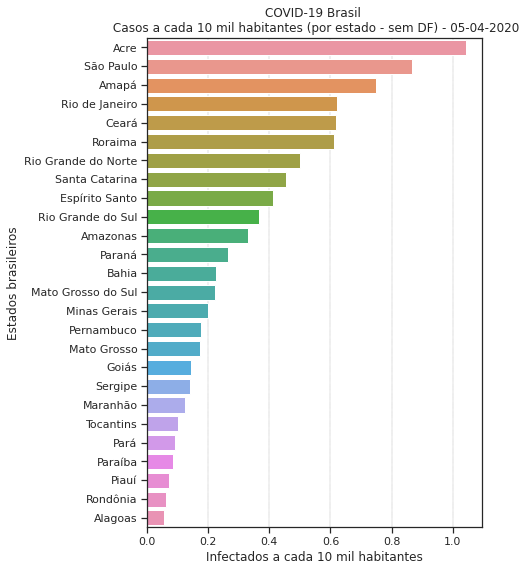

In [35]:
#hide_input

# relative approach bar plot (without DF)

plt.figure(figsize=(6,9))
plt.grid(color='black', linestyle='--', linewidth=0.17)
sns.barplot(df_last_semdf['Relativa'],df_last_semdf['state'],orient="h")

plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado - sem DF) - {}'.format(today))
plt.ylabel('Estados brasileiros')
plt.xlabel('Infectados a cada 10 mil habitantes')
plt.savefig('plots/14_brasil_relativo_sem_df',bbox_inches = 'tight')

In [0]:
#hide
#plt.figure(figsize=(15,8))
#sns.lineplot(x='date',y='confirmed',data=x)
#plt.title('COVID-19 - Crescimento {}(relativo)- {}'.format(y,today))
#texto1 = 'Quarentena'
#plt.text('2020-03-24',125,texto1,fontsize=12)
#
#plt.grid(color='black', linestyle='--', linewidth=0.17)


In [0]:
#hide
# exporting xlsx to concat with up to date data
#df_last1 = casos_mar5
#df_last1.columns = ['Estado', 'Dia','Casos','Mortes','População','Relativa']
#df_last1 = df_last1.reindex(columns=['Dia','Casos','Estado','Mortes','População','Relativa'])
#df2 = df_last1[df_last1['Dia']<'2020-03-25']
#df2.tail(3)

In [0]:
#hide
#df2.to_excel('graficovid/Tabela_brasil_até_25.xlsx',index=False)

In [38]:
#hide
casos_mar5.columns

Index(['state', 'date', 'confirmed', 'deaths', 'população', 'Relativa'], dtype='object')

In [0]:
#hide
casos_mar5.columns = ['Estado', 'Dia', 'Casos', 'Mortes', 'população', 'Relativa']

In [0]:
#hide
sul = casos_mar5[(casos_mar5['Estado']=='Paraná') | (casos_mar5['Estado']=='Santa Catarina') | (casos_mar5['Estado']=='Rio Grande do Sul')]

In [0]:
#hide
sudeste = casos_mar5[(casos_mar5['Estado']=='São Paulo') | (casos_mar5['Estado']=='Minas Gerais') | (casos_mar5['Estado']=='Rio de Janeiro') | (casos_mar5['Estado']=='Espírito Santo ')]

In [0]:
#hide
centroeste =  casos_mar5[(casos_mar5['Estado']=='Goiás') | (casos_mar5['Estado']=='Mato Grosso') | (casos_mar5['Estado']=='Mato Grosso do Sul')]

In [0]:
#hide
norte = casos_mar5[(casos_mar5['Estado']=='Acre') | (casos_mar5['Estado']=='Amapá') | (casos_mar5['Estado']=='Amazonas') | (casos_mar5['Estado']=='Pará') | (casos_mar5['Estado']=='Rondônia')| (casos_mar5['Estado']=='Roraima')| (casos_mar5['Estado']=='Tocantins')]

In [0]:
#hide
nordeste = casos_mar5[(casos_mar5['Estado']=='Alagoas') | (casos_mar5['Estado']=='Bahia') | (casos_mar5['Estado']=='Ceará') | (casos_mar5['Estado']=='Maranhão') | (casos_mar5['Estado']=='Paraíba')| (casos_mar5['Estado']=='Pernambuco')| (casos_mar5['Estado']=='Piauí')| (casos_mar5['Estado']=='Rio Grande do Norte')| (casos_mar5['Estado']=='Piauí')]

<center> <h2> Curvas de contaminação por regiões</h2> </center>


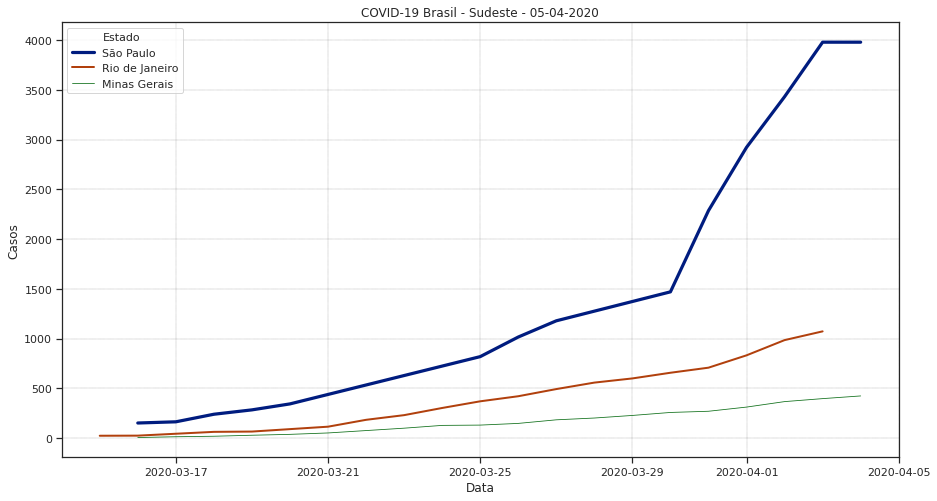

In [45]:
#hide_input
#Sudeste absoluta
sudeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=sudeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sudeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

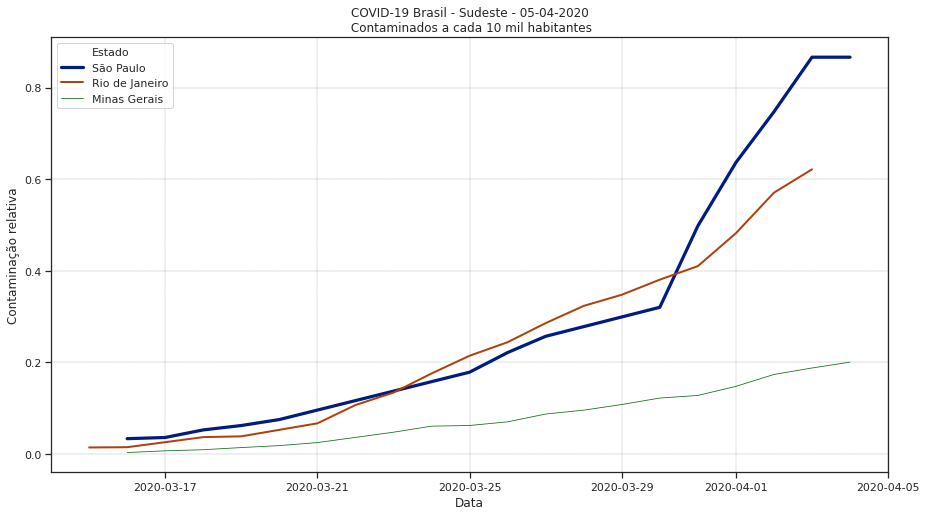

In [46]:
#hide_input
#sudeste relativa
sudeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=sudeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sudeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/19_sudeste_relativa.png",bbox_inches = 'tight')

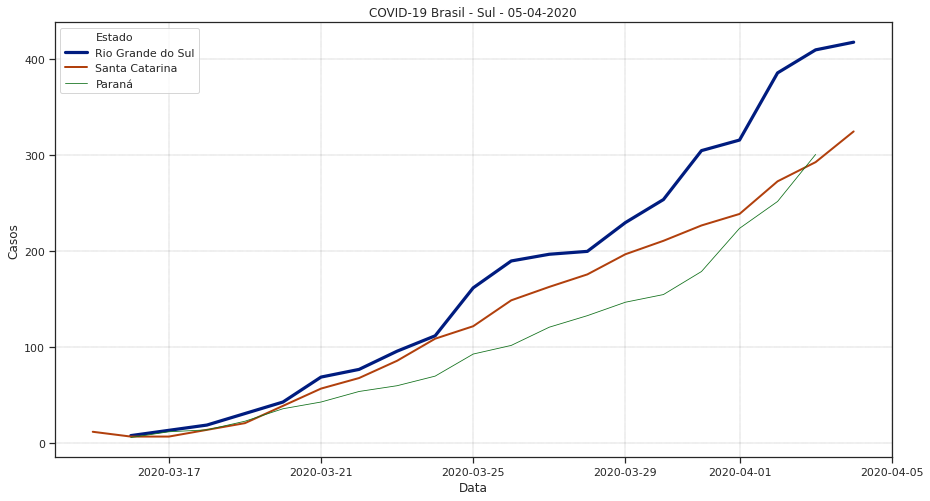

In [47]:
#hide_input
#sul absoluta
sul.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=sul,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sul - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/20_sul_absoluta.png",bbox_inches = 'tight')

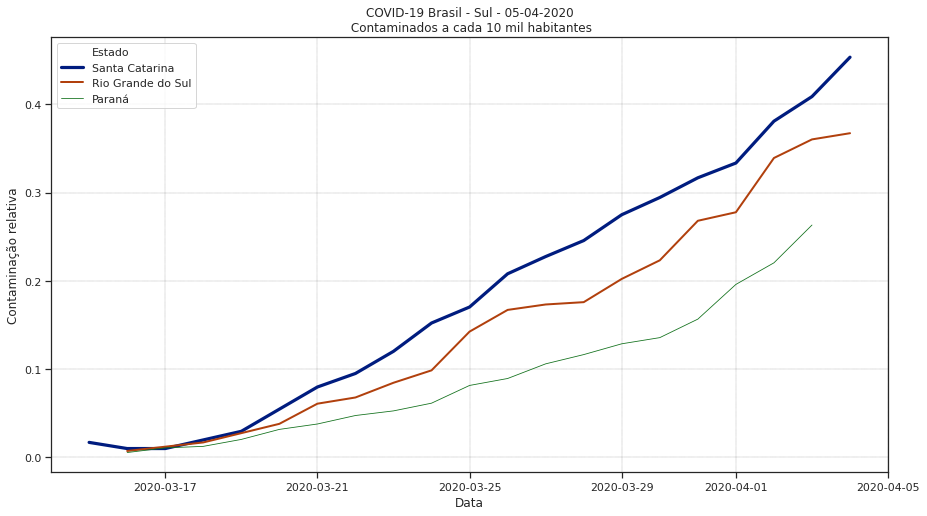

In [48]:
#hide_input
#sul relativa
sul.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=sul,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sul - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/21_sul_relativa.png",bbox_inches = 'tight')

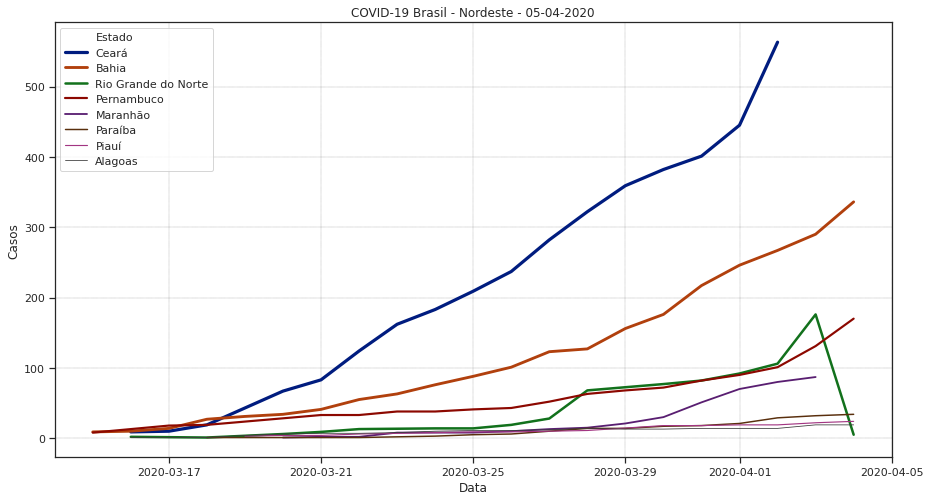

In [49]:
#hide_input
#nordeste absoluta
nordeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=nordeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Nordeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/22_nordeste_absoluta.png",bbox_inches = 'tight')

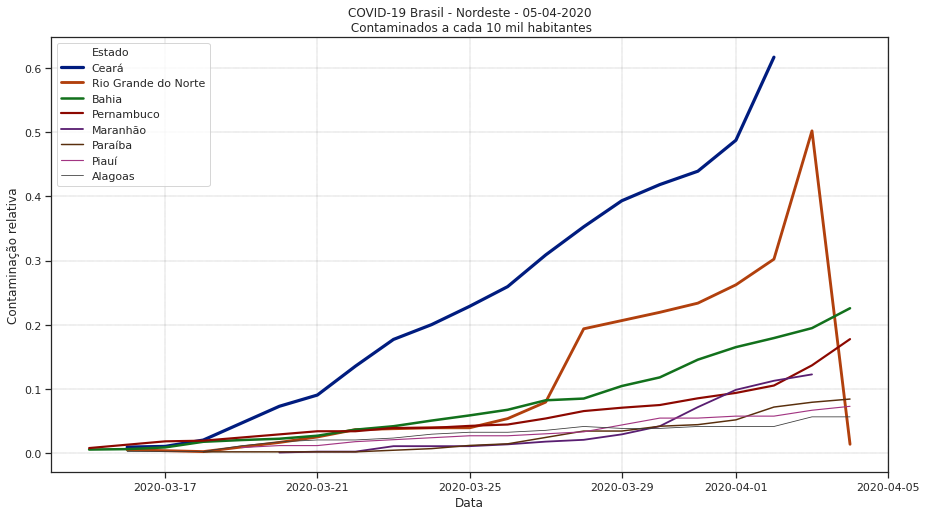

In [50]:
#hide_input
#nordeste relativa
nordeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=nordeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Nordeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/23_brasil_curva_relativa.png",bbox_inches = 'tight')

In [0]:
#hide
norte = norte.sort_values(['Estado','Casos'])


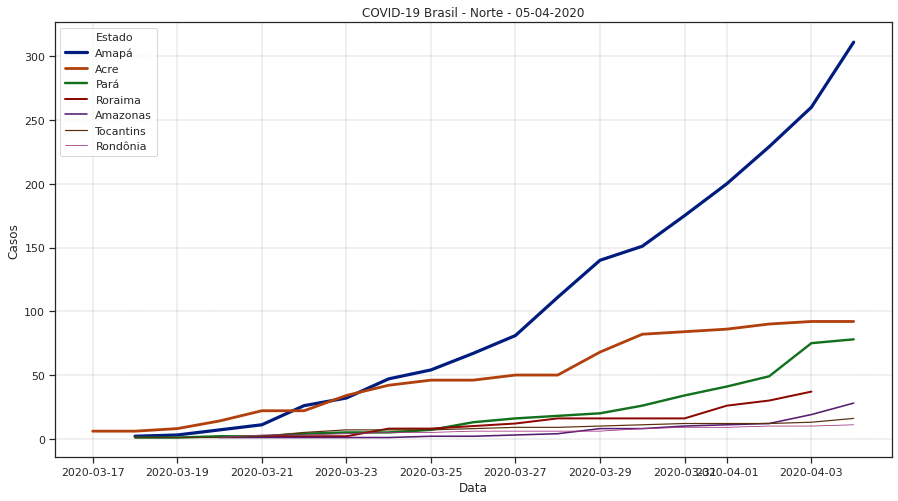

In [52]:
#hide_input
#norte absoluta
norte.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=norte,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Norte - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/24_norte_absoluta.png",bbox_inches = 'tight')

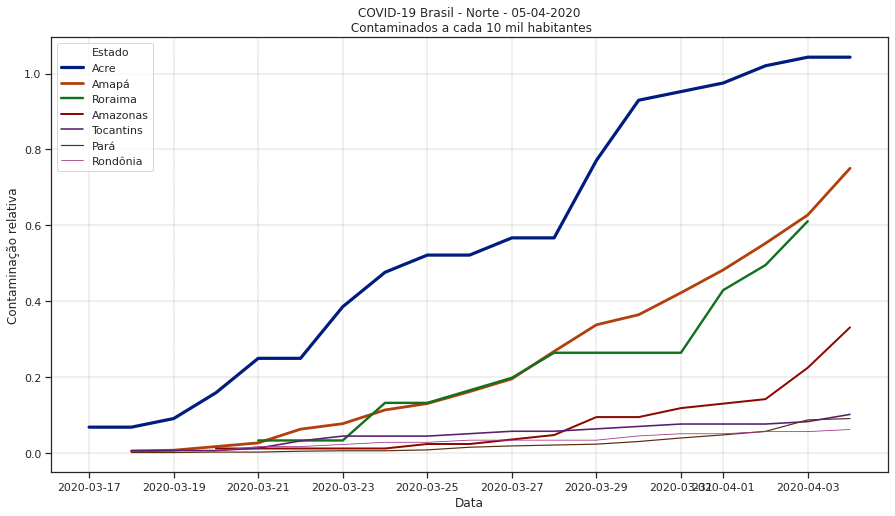

In [53]:
#hide_input
#norte relativa
norte.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=norte,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Norte - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/25_norte_relativa.png",bbox_inches = 'tight')

In [0]:
#hide
centroeste = centroeste.sort_values(['Estado','Casos'])


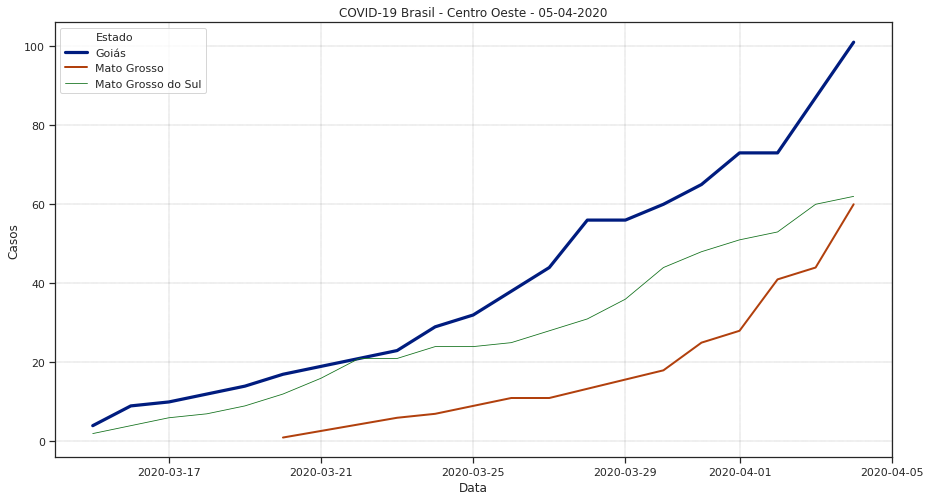

In [55]:
#hide_input
#centroste absoluta
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=centroeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Centro Oeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/26_centroeste_absoluta.png",bbox_inches = 'tight')

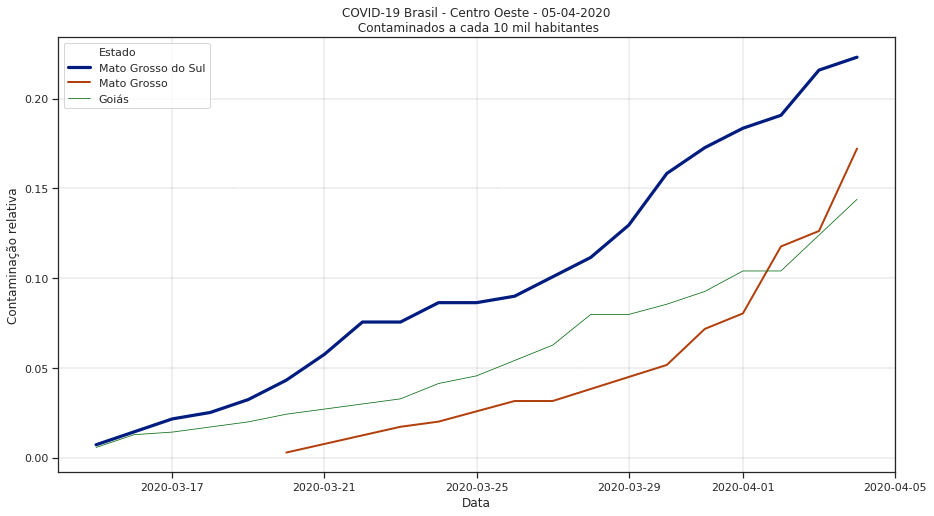

In [56]:
#hide_input
#centroeste relativa
centroeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=centroeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Centro Oeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/27_centroeste_relativa.png",bbox_inches = 'tight')

<center> <h2> Óbitos </h2> </center>


In [57]:
#hide
casos_por_estado.sort_values(['date','deaths'],inplace=True)
casos_por_estado[casos_por_estado['date']=='2020-04-01']

,state,date,confirmed,deaths,população,Relativa
15,Acre,2020-04-01,86,0.0,881935,0.975129
75,Amazonas,2020-04-01,11,0.0,845731,0.130065
165,Espírito Santo,2020-04-01,120,0.0,4018650,0.298608
263,Mato Grosso,2020-04-01,28,0.0,3484466,0.080357
426,Roraima,2020-04-01,26,0.0,605761,0.429212
486,Sergipe,2020-04-01,22,0.0,2298696,0.095706
534,Tocantins,2020-04-01,12,0.0,1572866,0.076294
40,Alagoas,2020-04-01,14,1.0,3337357,0.041949
188,Goiás,2020-04-01,73,1.0,7018354,0.104013
204,Maranhão,2020-04-01,70,1.0,7075181,0.098937


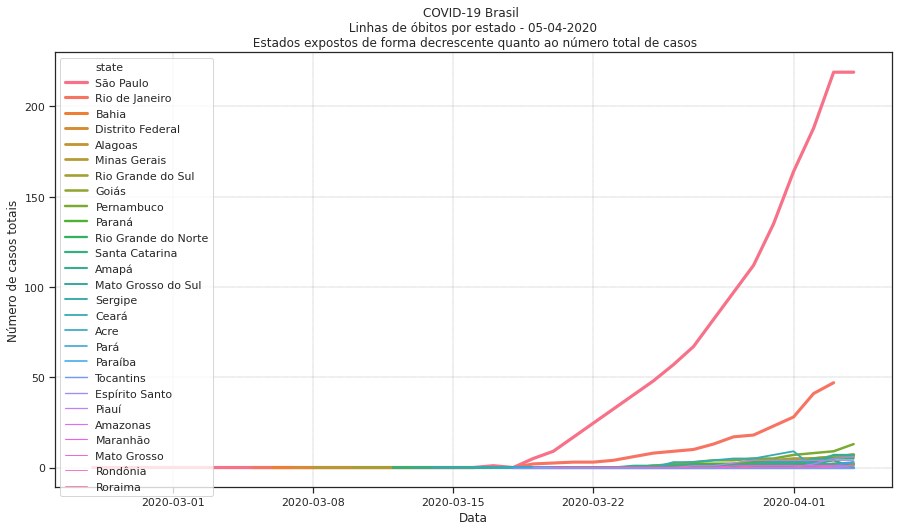

In [58]:
#hide_input

#absolute approach line plot
plt.figure(figsize=(15,8))
sns.lineplot(x="date",y='deaths',data=casos_por_estado,hue='state',size="state")
plt.title('COVID-19 Brasil \n Linhas de óbitos por estado - {} \n Estados expostos de forma decrescente quanto ao número total de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Número de casos totais')
plt.savefig("plots/15_curvas_brasileiras.png")

<center> <h2> Óbitos por regiões </h2> </center>


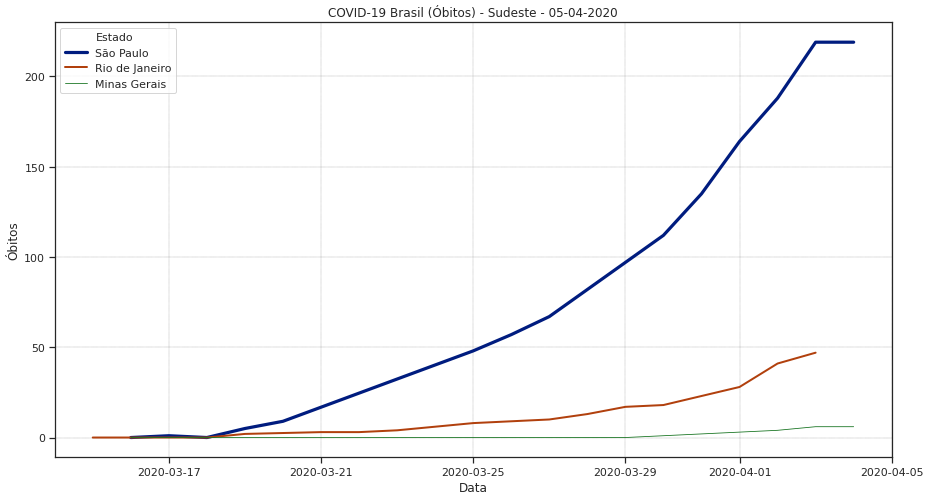

In [59]:
#hide_input
#Sudeste absoluta
sudeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=sudeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil (Óbitos) - Sudeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

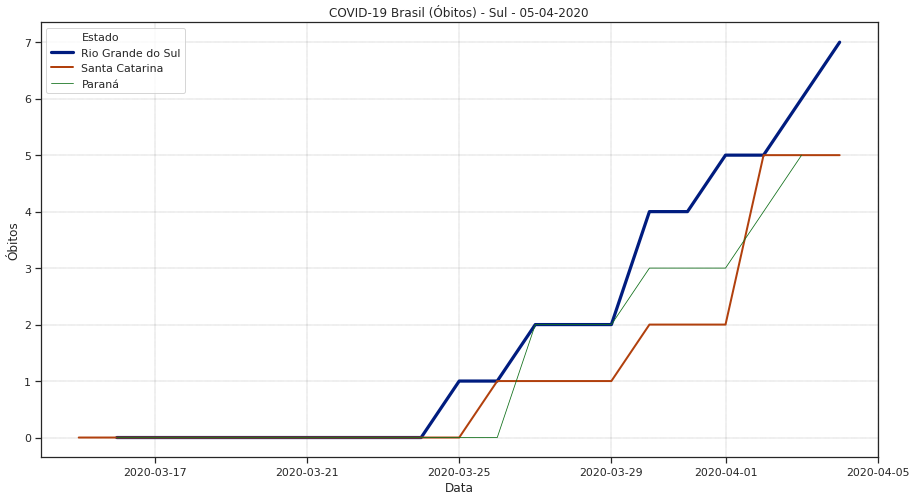

In [60]:
#hide_input
#Sul absoluta

sul.sort_values('Mortes',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=sul,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil (Óbitos) - Sul - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

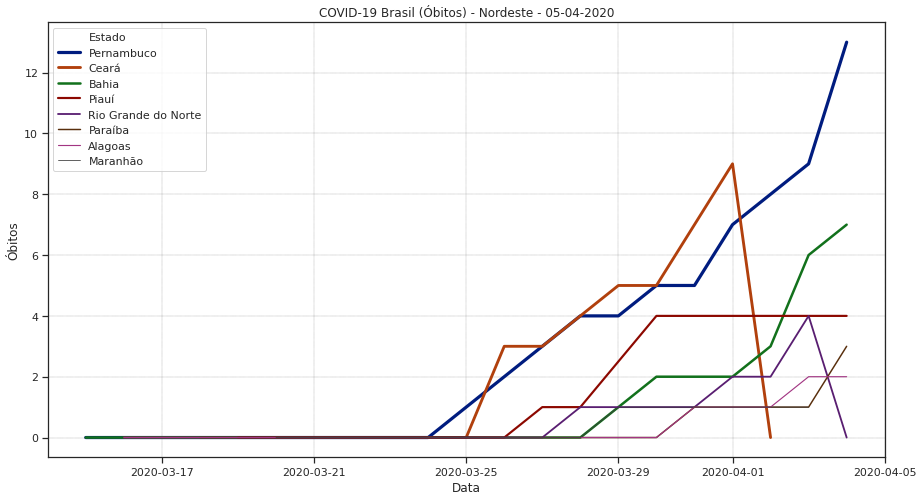

In [61]:
#hide_input
#nordeste absoluta

nordeste.sort_values('Mortes',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=nordeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil (Óbitos) - Nordeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

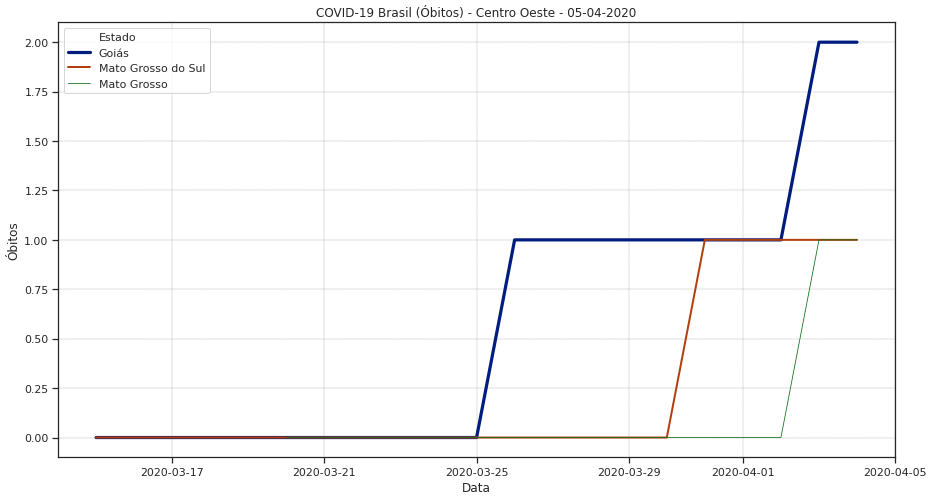

In [62]:
#hide_input
#centroeste absoluta

centroeste.sort_values('Mortes',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=centroeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil (Óbitos) - Centro Oeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

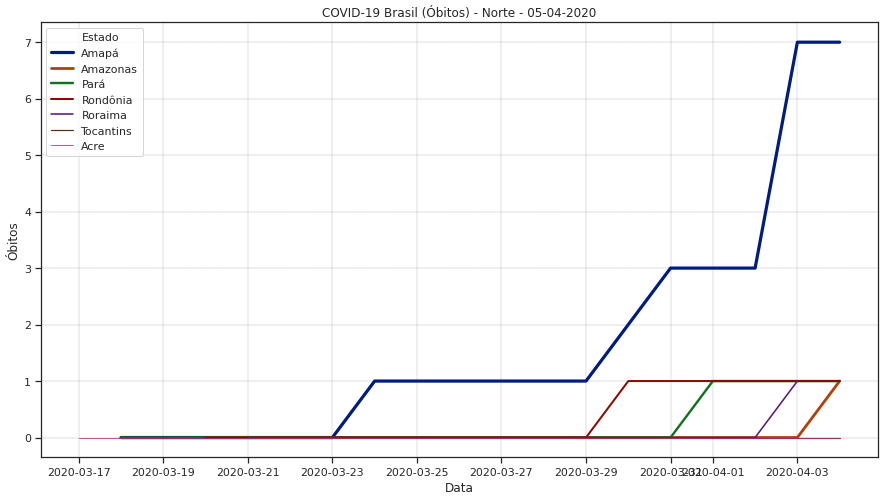

In [65]:
#hide_input
#norte absoluta
norte.sort_values('Mortes',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=norte,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil (Óbitos) - Norte - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

<center> <h2> Tabela das 200 cidades com mais casos </h2> </center>


In [66]:
#hide
casos_por_cidade = casos.groupby(['state','city','date']).sum()[['confirmed', 'deaths']]
casos_por_cidade = casos_por_cidade.reset_index(level=[0,1])

casos_por_cidade.head(5)

,state,city,confirmed,deaths
date,,,,
2020-03-29,AC,Acrelândia,2,0.0
2020-03-30,AC,Acrelândia,6,0.0
2020-03-31,AC,Acrelândia,7,0.0
2020-04-01,AC,Acrelândia,8,0.0
2020-04-02,AC,Acrelândia,8,0.0


In [0]:
#hide
cidade_last = casos_por_cidade[casos_por_cidade.index==str(yesterday)]

In [0]:
#hide
cap = ['Rio Branco','Maceió','Macapá','Manaus','Salvador','Fortaleza','Brasília','Vitória','Goiânia','São Luís','Cuiabá','Campo Grande','Belo Horizonte','Belém','João Pessoa','Curitiba','Recife','Teresina','Rio de Janeiro','Natal','Porto Alegre','Porto Velho','Boa Vista','Florianópolis','São Paulo','Aracaju','Palmas']

In [0]:
#hide
capitais = casos_por_cidade[casos_por_cidade['city'].isin(['Rio Branco','Maceió','Macapá','Manaus','Salvador','Fortaleza','Brasília','Vitória','Goiânia','São Luís','Cuiabá','Campo Grande','Belo Horizonte','Belém','João Pessoa','Curitiba','Recife','Teresina','Rio de Janeiro','Natal','Porto Alegre','Porto Velho','Boa Vista','Florianópolis','São Paulo','Aracaju','Palmas'])]
capitais_15 = capitais[capitais.index>='2020-03-20']

In [70]:
#hide
capitais_15.sort_values('confirmed',ascending=False,inplace=True)
teste = capitais_15.groupby(capitais_15.index)
teste

In [71]:
#hide
pro_bra = casos.groupby('date').sum()[['deaths','confirmed']]
pro_bra

,deaths,confirmed
date,,
2020-02-26,0.0,2
2020-02-27,0.0,2
2020-02-28,0.0,4
2020-02-29,0.0,4
2020-03-01,0.0,4
2020-03-02,0.0,4
2020-03-03,0.0,4
2020-03-04,0.0,6
2020-03-05,0.0,13


In [72]:
#hide
pro_bra['Alemanha'] = pro_bra['deaths']*100
pro_bra['Coreia'] = pro_bra['deaths']*166.6
pro_bra['Data'] = pro_bra.index
pro_bra.columns = ['Óbitos','Brasil registrado','Projeção Alemanha','Projeção Coréia do Sul','Data']
pro_bra = pro_bra[pro_bra['Data']>='2020-03-17']
pro_bra.tail(3)

,Óbitos,Brasil registrado,Projeção Alemanha,Projeção Coréia do Sul,Data
date,,,,,
2020-04-02,283.0,8035,28300.0,47147.8,2020-04-02
2020-04-03,342.0,8506,34200.0,56977.2,2020-04-03
2020-04-04,296.0,7147,29600.0,49313.6,2020-04-04


In [73]:
#hide_input
pd.set_option('display.max_rows', None) 
x= cidade_last.sort_values('confirmed',axis=0,ascending=False)
x.columns = ['Estado','Cidade','Casos','Mortes']
x.reset_index(level=[0],drop=True)
x.head(200)

,Estado,Cidade,Casos,Mortes
date,,,,
2020-04-04,SP,São Paulo,3202,186.0
2020-04-04,DF,Brasília,456,7.0
2020-04-04,AM,Manaus,283,5.0
2020-04-04,RS,Porto Alegre,241,4.0
2020-04-04,MG,Belo Horizonte,237,3.0
2020-04-04,BA,Salvador,215,5.0
2020-04-04,PE,Recife,119,10.0
2020-04-04,SC,Florianópolis,90,1.0
2020-04-04,SP,São Bernardo do Campo,70,4.0


In [0]:
#hide
sudeste.set_index('Dia',inplace=True)


In [0]:
#hide
sudeste = sudeste.sort_index(ascending=True)



In [0]:
#hide
sudeste

In [0]:
#hide

fig = px.bar(sudeste, x="Casos", y="Estado", color="Estado",orientation='h',
             animation_frame='Dia', animation_group='Estado', range_x=[0,1000])
fig.show()

In [0]:
#hide
casos_por_estado['date'] = casos_por_estado['date'].dt.strftime('%Y-%m-%d')


In [0]:
#hide
fig = px.bar(casos_por_estado, x="confirmed", y="state", color="state",orientation='h',
             animation_frame='date', animation_group='state', range_x=[0,1000])
fig.show()

In [0]:
#hide
casos.columns

In [0]:
#hide
sampa_meo = casos[casos['city']=='São Paulo']
sampa_meo= sampa_meo.sort_values('date',ascending=True)
sampa_meo['cumulativo'] = sampa_meo['confirmed'].cumsum()

sampa_meo

In [0]:
#hide
# absolute approach bar plot
df_last.sort_values('deaths',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
sns.barplot(df_last['deaths'],df_last['state'],orient="h",)
plt.ylabel('Estados brasileiros')
plt.xlabel('Número total de mortes')
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))


plt.savefig('plots/12_brasil',bbox_inches = 'tight')

In [0]:
#hide
casos_mar5.sort_values('Mortes',ascending=False,inplace=True)

hue = casos_mar5['Estado'].unique()

In [0]:
#hide
#hide
#Relativa approach line plot

plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=casos_mar5,hue='Estado',size="Estado",hue_order=hue)
plt.title('COVID-19 Brasil \n Mortes por estado  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dia')
plt.ylabel('Número de casos a cada 10 mil habitantes')
#plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')

In [0]:
#hide
sns.FacetGrid(sul[sul['Estado']=='Paraná'],col='Casos',hue='Estado')